In [6]:
import pandas as pd
import numpy as np

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [8]:
desc = pd.read_csv('descriptors.csv')
list(np.unique(desc.dtypes))
desc.head()

C:\Users\lyuob\AppData\Local\Temp\ipykernel_12192\3371987129.py:1: DtypeWarning: Columns (364,373,382,391,400,409,418,427,436,445,454,571,580,589,598,607,616,625,634,643,652,661,670,678,686,694,702,710,718,726,734,742,750,758,766,774,782,790,798,806,814,822,830,838,846,854,862,1016,1053,1054,1055,1069,1070,1071,1526) have mixed types. Specify dtype option on import or set low_memory=False.
  desc = pd.read_csv('descriptors.csv')


,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,gdb_110298,CCC1C2C(O)C2C1C,2.08389,1.40096,1.20534,1.3323,85.23,-0.2424,0.0680,0.3103,...,10.002020,62.170441,126.104465,5.482803,84,9,52.0,68.0,3.805556,2.000000
1,gdb_2851,OCC1CC1C=O,5.87951,1.42621,1.24696,2.6127,59.30,-0.2483,-0.0195,0.2288,...,8.673342,54.073722,100.052429,6.670162,47,5,32.0,37.0,2.972222,1.777778
2,gdb_18078,CC#CC1C2COC12,4.83398,1.21834,1.13454,1.4475,73.84,-0.2224,0.0542,0.2766,...,9.585965,59.659094,108.057515,6.753595,66,5,44.0,55.0,2.333333,1.833333
3,gdb_36538,N#CCN=C1OC2CC12,4.57418,0.90022,0.87379,5.8752,73.04,-0.2754,-0.0059,0.2695,...,9.599066,60.357687,122.048013,8.136534,98,6,48.0,58.0,2.583333,2.055556
4,gdb_91667,OC1CC2OC1C21CN1,2.56991,1.73865,1.37865,2.1139,71.36,-0.2450,0.0652,0.3102,...,10.186521,63.046892,127.063329,7.059074,74,9,60.0,80.0,2.395833,1.777778


In [9]:
des_cleaned = desc.drop(columns=['mol_id', 'homo','lumo'], axis=1)
des_cleaned.drop_duplicates(subset=['smiles'], inplace=True)
des_cleaned.reset_index(drop=True, inplace=True)
des_cleaned

,smiles,A,B,C,mu,alpha,gap,r2,zpve,u0,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,CCC1C2C(O)C2C1C,2.08389,1.40096,1.20534,1.3323,85.23,0.3103,1226.9785,0.205331,-388.261550,...,10.002020,62.170441,126.104465,5.482803,84,9,52.0,68.0,3.805556,2.000000
1,OCC1CC1C=O,5.87951,1.42621,1.24696,2.6127,59.30,0.2288,926.6322,0.123723,-345.641890,...,8.673342,54.073722,100.052429,6.670162,47,5,32.0,37.0,2.972222,1.777778
2,CC#CC1C2COC12,4.83398,1.21834,1.13454,1.4475,73.84,0.2766,1102.0694,0.129543,-346.530283,...,9.585965,59.659094,108.057515,6.753595,66,5,44.0,55.0,2.333333,1.833333
3,N#CCN=C1OC2CC12,4.57418,0.90022,0.87379,5.8752,73.04,0.2695,1327.2074,0.112518,-416.777744,...,9.599066,60.357687,122.048013,8.136534,98,6,48.0,58.0,2.583333,2.055556
4,OC1CC2OC1C21CN1,2.56991,1.73865,1.37865,2.1139,71.36,0.3102,987.2540,0.148644,-439.017007,...,10.186521,63.046892,127.063329,7.059074,74,9,60.0,80.0,2.395833,1.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,O=C1COC11CCC=C1,3.01407,1.36943,1.24603,1.2647,75.27,0.2092,1069.2692,0.135812,-421.836451,...,9.669093,53.899913,124.052429,7.297202,79,9,50.0,61.0,2.673611,1.958333
19993,COC12CC1(O)CC2=O,2.21546,1.62176,1.11483,3.5987,70.83,0.2209,1113.9128,0.133025,-458.929553,...,10.332702,63.657065,128.047344,7.532197,79,9,56.0,75.0,3.986111,1.895833
19994,C1OC2C3C4COC12C34,3.33758,1.94944,1.54892,1.9758,69.95,0.3088,868.5233,0.138397,-421.758239,...,10.762679,65.363367,124.052429,7.297202,70,8,68.0,96.0,1.506944,1.694444
19995,CC(=O)C1CC=CC1=O,2.53732,1.53729,1.08600,2.7836,75.62,0.1913,1116.2490,0.135123,-421.888915,...,8.735364,51.247665,124.052429,7.297202,84,9,42.0,47.0,4.083333,2.055556


In [10]:
bool_col = des_cleaned.select_dtypes(include=['bool']).columns

des_cleaned[bool_col] = des_cleaned[bool_col].astype(int)

label_encoder = LabelEncoder()
des_cleaned['smiles_encoded'] = label_encoder.fit_transform(des_cleaned['smiles'])
des_cleaned.drop(columns=['smiles'], axis=1, inplace=True)

non_numeric_columns = des_cleaned.select_dtypes(exclude=['float', 'int']).columns.tolist()
deleted_columns = []
for column in non_numeric_columns:
    if column in des_cleaned.columns:
        if any(pd.to_numeric(des_cleaned[column], errors='coerce').isnull()):
            deleted_columns.append(column)
            des_cleaned = des_cleaned.drop(column, axis=1)
    else:
        print(f"Column '{column}' not found in DataFrame.")
        
print(des_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Columns: 1442 entries, A to smiles_encoded
dtypes: float64(1115), int32(3), int64(324)
memory usage: 219.8 MB
None


In [11]:
no_gap = pd.DataFrame()
no_gap['gap'] = des_cleaned['gap']
no_gap['smiles_encoded'] = des_cleaned['smiles_encoded']
des_cleaned.drop(columns=['gap'], inplace=True)

corr_matrix = des_cleaned.corr()

high_corr_descriptors = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            high_corr_descriptors.add(corr_matrix.columns[i])

data_filtered = des_cleaned.drop(high_corr_descriptors, axis=1)

Удалены следующие дескрипторы с высокой корреляцией:
{'AATSC3dv', 'fr_ketone_Topliss', 'MPC5', 'ATS0v', 'ATSC8v', 'n6AHRing', 'SdsN', 'MATS3v', 'SsF', 'AATS0pe', 'ATSC4se', 'nC', 'BIC0', 'VR1_Dzm', 'VE1_DzZ', 'Xp-0d', 'VSA_EState8.1', 'ATS2pe', 'AATS1i', 'GATS3se', 'AATSC1d', 'AATSC4pe', 'ATSC5are', 'ATS0pe', 'MolLogP', 'AMID_N', 'n5ARing', 'n9FaHRing', 'n9ARing', 'fr_Nhpyrrole', 'Chi1', 'ATS8v', 'SpMax_Dzse', 'ZMIC1', 'BCUTse-1h', 'SMR_VSA3.1', 'ATSC5i', 'ETA_dEpsilon_D', 'VR2_Dzi', 'StsC', 'AATSC0are', 'VE2_D', 'TIC5', 'AATS2Z', 'n3ARing', 'Chi1v', 'fragCpx', 'Xp-3dv', 'SM1_Dzpe', 'ATS5i', 'Chi0v', 'Mp', 'SpAbs_Dzm', 'ATS0m', 'AATSC0v', 'AMID_X', 'SpAD_Dzm', 'GATS3m', 'GATS1m', 'AATS1se', 'Xch-4dv', 'BCUTse-1l', 'SLogP', 'ATS7s', 'PEOE_VSA11.1', 'VE3_D', 'Xch-7d', 'ATS8s', 'HallKierAlpha', 'GATS1pe', 'ATSC7d', 'BCUTd-1h', 'SIC2', 'AETA_eta_FL', 'Chi0n', 'SpAD_Dzse', 'n8FARing', 'MATS4s', 'ATS5m', 'SMR_VSA7.1', 'IC0', 'SlogP_VSA6', 'ATS4v', 'SpAD_Dzv', 'EState_VSA3.1', 'AATSC1se', 'GA

In [12]:
data_filtered.head()

,A,B,mu,alpha,zpve,u0,cv,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,...,GGI8,GGI9,GGI10,JGI4,JGI8,JGI9,JGI10,Radius,TopoShapeIndex,smiles_encoded
0,2.08389,1.40096,1.3323,85.23,0.205331,-388.261550,37.199,9.238148,0.087917,0.087917,...,0.0,0.0,0.0,0.063222,0.0,0.0,0.0,3,0.666667,10582
1,5.87951,1.42621,2.6127,59.30,0.123723,-345.641890,26.593,9.825324,0.183935,0.183935,...,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,3,0.666667,18864
2,4.83398,1.21834,1.4475,73.84,0.129543,-346.530283,28.095,5.167315,0.543935,0.543935,...,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,3,0.666667,2577
3,4.57418,0.90022,5.8752,73.04,0.112518,-416.777744,28.426,8.121982,0.248565,0.248565,...,0.0,0.0,0.0,0.055222,0.0,0.0,0.0,3,1.000000,14791
4,2.56991,1.73865,2.1139,71.36,0.148644,-439.017007,30.134,9.249977,-0.189815,0.127315,...,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,2,1.000000,18150


In [13]:
merge = pd.merge(data_filtered, no_gap[['smiles_encoded','gap']], on = 'smiles_encoded', how = 'left')
merge.describe()

,A,B,mu,alpha,zpve,u0,cv,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,...,GGI9,GGI10,JGI4,JGI8,JGI9,JGI10,Radius,TopoShapeIndex,smiles_encoded,gap
count,19997.000000,19997.000000,19997.00000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,...,19997.0,19997.0,19997.000000,19997.0,19997.0,19997.0,19997.000000,19997.000000,19997.000000,19997.000000
mean,15.057305,1.399402,2.65006,75.593052,0.151290,-408.710707,31.799318,8.223412,-0.016112,0.288564,...,0.0,0.0,0.056004,0.0,0.0,0.0,2.724109,0.759697,9998.000000,0.254200
std,1645.282132,0.467192,1.48966,8.179611,0.032177,37.957599,4.067191,2.440210,0.548856,0.258707,...,0.0,0.0,0.037048,0.0,0.0,0.0,0.520768,0.236820,5772.781002,0.046491
min,1.408330,0.361410,0.00000,28.780000,0.028773,-546.193927,12.482000,1.500000,-4.991319,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.078700
25%,2.544630,1.092980,1.56040,70.840000,0.129428,-436.980362,29.182000,5.549769,-0.357639,0.086806,...,0.0,0.0,0.032000,0.0,0.0,0.0,2.000000,0.666667,4999.000000,0.219100
50%,3.064610,1.373390,2.44140,75.930000,0.149813,-413.002174,31.776000,9.018796,0.006944,0.212963,...,0.0,0.0,0.053333,0.0,0.0,0.0,3.000000,0.666667,9998.000000,0.253200
75%,3.807270,1.653930,3.56730,80.910000,0.172073,-386.144637,34.506000,10.257769,0.370556,0.421296,...,0.0,0.0,0.076444,0.0,0.0,0.0,3.000000,1.000000,14997.000000,0.291000
max,232663.788800,9.446830,22.96050,130.860000,0.273309,-116.609549,46.190000,12.193843,2.094388,2.094388,...,0.0,0.0,0.222222,0.0,0.0,0.0,4.000000,1.000000,19996.000000,0.429800


In [14]:
merge = merge.iloc[:, merge.std().values > 0]
merge.describe()

,A,B,mu,alpha,zpve,u0,cv,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,...,n9FaRing,GGI4,GGI5,GGI6,GGI7,JGI4,Radius,TopoShapeIndex,smiles_encoded,gap
count,19997.000000,19997.000000,19997.00000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,...,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000
mean,15.057305,1.399402,2.65006,75.593052,0.151290,-408.710707,31.799318,8.223412,-0.016112,0.288564,...,0.001250,0.213093,0.032747,0.003372,0.000216,0.056004,2.724109,0.759697,9998.000000,0.254200
std,1645.282132,0.467192,1.48966,8.179611,0.032177,37.957599,4.067191,2.440210,0.548856,0.258707,...,0.035337,0.125497,0.049867,0.013317,0.002684,0.037048,0.520768,0.236820,5772.781002,0.046491
min,1.408330,0.361410,0.00000,28.780000,0.028773,-546.193927,12.482000,1.500000,-4.991319,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.078700
25%,2.544630,1.092980,1.56040,70.840000,0.129428,-436.980362,29.182000,5.549769,-0.357639,0.086806,...,0.000000,0.125000,0.000000,0.000000,0.000000,0.032000,2.000000,0.666667,4999.000000,0.219100
50%,3.064610,1.373390,2.44140,75.930000,0.149813,-413.002174,31.776000,9.018796,0.006944,0.212963,...,0.000000,0.222222,0.000000,0.000000,0.000000,0.053333,3.000000,0.666667,9998.000000,0.253200
75%,3.807270,1.653930,3.56730,80.910000,0.172073,-386.144637,34.506000,10.257769,0.370556,0.421296,...,0.000000,0.302222,0.062500,0.000000,0.000000,0.076444,3.000000,1.000000,14997.000000,0.291000
max,232663.788800,9.446830,22.96050,130.860000,0.273309,-116.609549,46.190000,12.193843,2.094388,2.094388,...,1.000000,0.722222,0.285000,0.111111,0.040816,0.222222,4.000000,1.000000,19996.000000,0.429800


In [ ]:
#Нормализация данных

In [16]:
df = merge 

In [17]:
descriptors = pd.DataFrame()
target = pd.DataFrame()
descriptors = df.iloc[:, df.columns!='gap']
target = df['gap']

In [18]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_descriptors = scaler.fit_transform(descriptors)
pca = PCA()
pca.fit(scaled_descriptors)
EVR = pca.explained_variance_ratio_
cumulative = np.cumsum(EVR)
n_components = np.argmax(cumulative >= 0.95)+1
print(f'Оптимальное количество компонентов: {n_components}')

Оптимальное количество компонентов: 80


In [19]:
pca = PCA(n_components=n_components)
tranformed_data = pca.fit_transform(scaled_descriptors)
print(tranformed_data)
transformed_df = pd.DataFrame(tranformed_data)
transformed_df['gap'] = target
transformed_df

[[ 1.24055034 -0.13245819 -0.87982445 ...  0.02768691 -0.10667863
  -0.0029321 ]
 [-0.64391716 -0.40875035 -0.16941102 ... -0.02439683  0.17290456
  -0.12278824]
 [ 1.24381025  0.34748372 -0.14938456 ... -0.02466187 -0.19657966
   0.03834354]
 ...
 [ 1.32561763 -0.90649096  0.78482632 ... -0.06374566  0.04247331
   0.10851934]
 [-0.6056102   0.4166804  -0.54259772 ... -0.16381337  0.03887628
   0.02661053]
 [-0.48468057 -0.22029144 -0.46805972 ... -0.01420622 -0.03824682
   0.07651592]]


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,gap
0,1.240550,-0.132458,-0.879824,-0.648629,0.604073,-0.213119,-0.045849,0.664593,-0.709788,0.325072,...,-0.066352,0.008163,0.209707,0.051812,-0.019989,-0.103780,0.027687,-0.106679,-0.002932,0.3103
1,-0.643917,-0.408750,-0.169411,0.241580,1.201692,-0.285381,-0.249832,-0.157810,-0.465639,0.475041,...,-0.050138,-0.031594,-0.066481,-0.021594,0.132823,0.094272,-0.024397,0.172905,-0.122788,0.2288
2,1.243810,0.347484,-0.149385,0.835656,0.492069,0.332015,-0.419686,-0.768451,0.820441,-0.622789,...,-0.032219,0.027982,0.158408,-0.045736,0.080800,0.050832,-0.024662,-0.196580,0.038344,0.2766
3,-0.648671,-0.043102,0.518333,1.064020,0.886751,1.064341,-0.788948,-0.381390,-0.059482,-0.499655,...,-0.475025,-0.477770,0.129606,-0.037187,-0.376374,-0.052626,-0.235332,0.049208,0.060671,0.2695
4,-0.099593,-2.082280,0.951922,-0.393641,0.368758,0.564843,1.681699,-0.190023,-0.255636,-0.052385,...,-0.128727,0.096715,0.171187,-0.122410,-0.024978,-0.098751,0.002455,-0.000374,-0.047179,0.3102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,-0.315817,-0.061441,0.393984,-0.482905,-0.160336,-0.563912,-0.420123,-0.783576,-0.449862,0.094529,...,-0.025094,0.005771,-0.009136,0.085950,-0.090815,0.068366,-0.046488,-0.016363,-0.066671,0.2092
19993,-0.987903,-0.951037,-0.541183,-0.547479,-0.710256,-0.574571,0.240388,-0.238317,-0.022308,0.072629,...,0.028499,0.008352,0.007362,0.006151,0.071895,-0.058980,-0.038930,-0.105717,0.077392,0.2209
19994,1.325618,-0.906491,0.784826,0.841836,0.274752,-0.699009,0.246604,-1.172966,1.120380,-0.038651,...,0.190397,-0.071371,0.027174,-0.066816,0.058701,-0.023180,-0.063746,0.042473,0.108519,0.3088
19995,-0.605610,0.416680,-0.542598,-1.368468,-0.734798,-0.356762,-0.977293,-1.012756,-0.126715,0.152113,...,0.023019,-0.044353,0.110683,0.073109,-0.086367,0.101637,-0.163813,0.038876,0.026611,0.1913


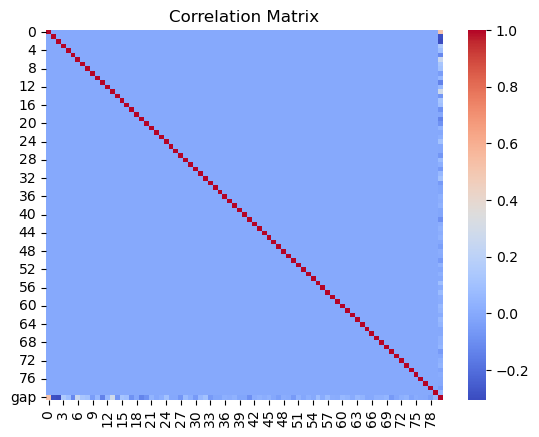

In [22]:
matrix = transformed_df.corr()
sns.heatmap(matrix, annot = False, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

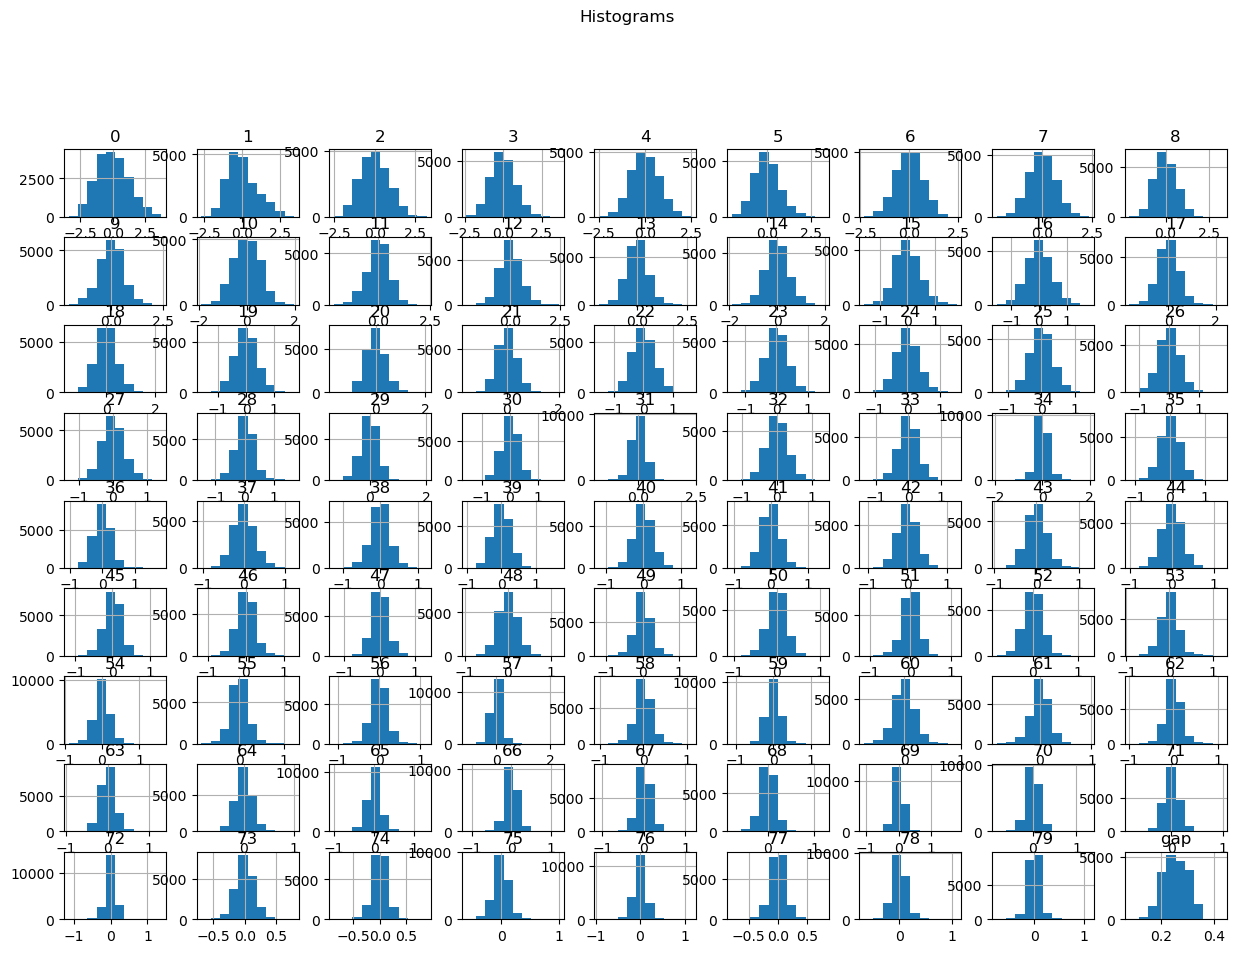

In [23]:
transformed_df.hist(bins = 10, figsize = (15,10))
plt.suptitle('Histograms', x = 0.5, y = 1.02)
plt.show()

C:\Users\lyuob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lyuob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lyuob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lyuob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: title={'center': 'Component Variance'}, xlabel='PCs', ylabel='Eigenvalues'>

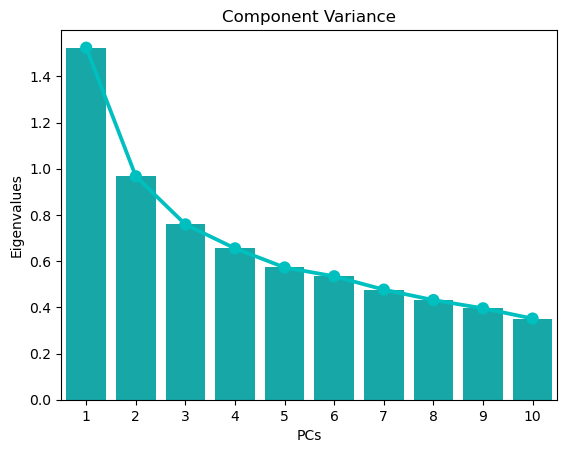

In [24]:
Scree = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'PCs':[i for i in range(1,pca.n_components_+1)]})

sns.barplot(x = 'PCs', y = 'Eigenvalues', data = Scree[0:10], color = 'c').set_title('Component Variance')
sns.pointplot(x = 'PCs', y = 'Eigenvalues', data = Scree[0:10], color = 'c')

In [ ]:
 Первая компонента (PC1) имеет наибольшее собственное значение и, следовательно, объясняет наибольшую вариативность данных. С каждой последующей компонентой (PC2, PC3 и так далее) дисперсия уменьшается.На основе этого графика можно предположить, что для данных можно сохранить первые 3 главные компоненты

C:\Users\lyuob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lyuob\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


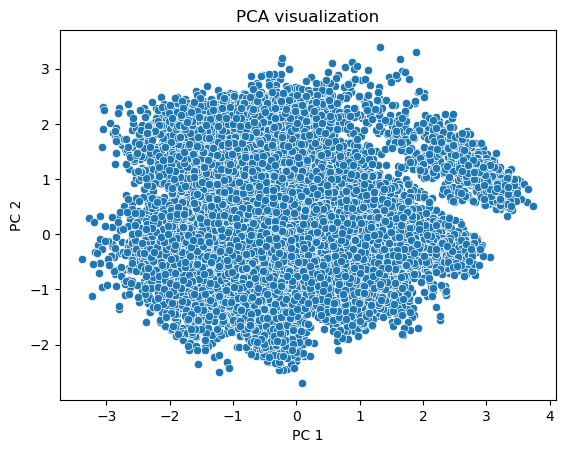

In [25]:
sns.scatterplot(x=transformed_df.iloc[:, 0], y=transformed_df.iloc[:, 1])

plt.xlabel('PC 1')
plt.ylabel('PC 2') 
plt.title('PCA visualization')
plt.show()

In [ ]:
Так как график не показывает явное разделение на группы или структур, требуется дополнительный анализ

In [26]:
vr = RandomForestRegressor(n_estimators=100)
vr.fit(df.loc[:, df.columns != 'gap'], df['gap'])

FI = vr.feature_importances_  # Correct attribute name
feature_names = df.columns[df.columns != 'gap']
selected_features = [feature_names[i] for i, importance in enumerate(FI) if importance > 0.01]

selected_importance = [importance for i, importance in enumerate(FI) if importance > 0.01]

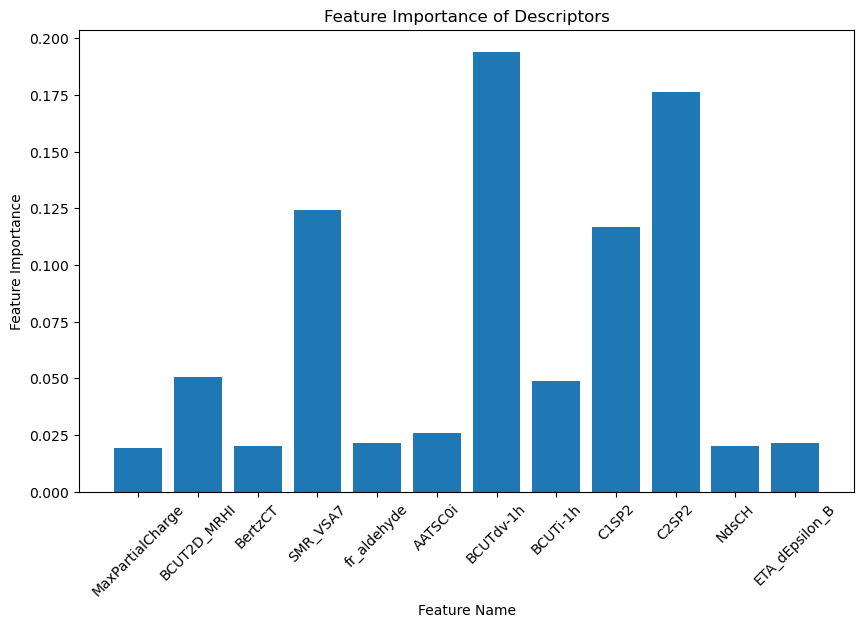

In [27]:
plt.figure(figsize=(10,6))
plt.bar(range(len(selected_features)), selected_importance, align = 'center')
plt.xticks(range(len(selected_features)), selected_features, rotation=45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Descriptors')
plt.show()

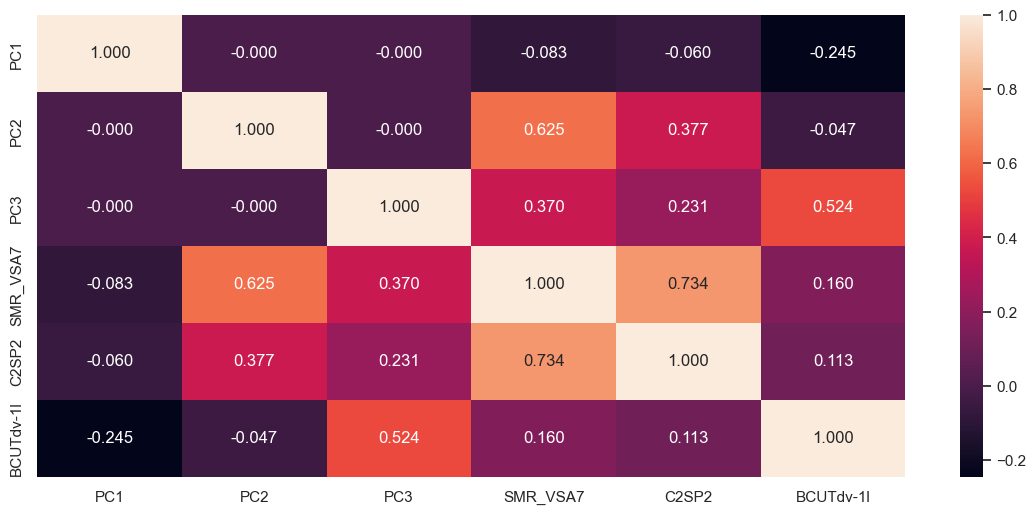

<Figure size 2800x1800 with 0 Axes>

In [33]:
transformed_df = pd.DataFrame(tranformed_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])
transformed_df['gap'] = target

df_pc = pd.DataFrame(data=transformed_df, columns=[f'PC{i}' for i in range(1, 63)])

df_col = pd.concat([df_pc[['PC1', 'PC2', 'PC3']], df[['SMR_VSA7', 'C2SP2', 'BCUTdv-1l']]], axis=1)

corMatrix = df_col.corr()

sns.set(rc={'figure.figsize': (14, 6)})

sns.heatmap(corMatrix, annot=True, fmt='.3f')

plt.figure(figsize=(28, 18))

plt.show()

In [ ]:
Корреляция между "PC3" и "SMRVSA7" составляет 0.734, что указывает на умеренно сильную положительную взаимосвязь между этими двумя переменными

In [37]:
from sklearn.decomposition import KernelPCA

In [39]:
sigm_pca = KernelPCA(n_components = 2, kernel = 'sigmoid', gamma = 0.01)
X_sigmoid = sigm_pca.fit_transform(scaled_descriptors)

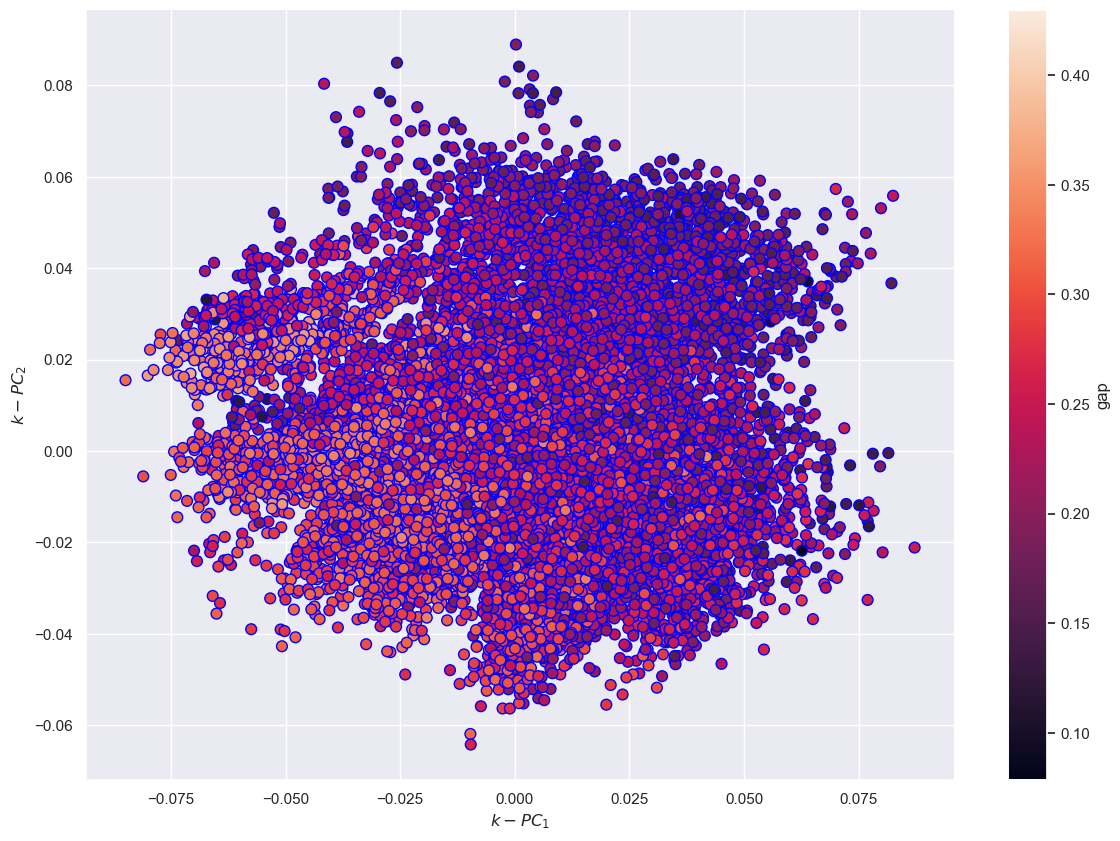

In [44]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(X_sigmoid[:,0], X_sigmoid[:,1], c=target, s=60, edgecolors='blue')
colorbar = fig.colorbar(scatter, ax=ax, label='gap')

plt.xlabel(r'$k-PC_1$')
plt.ylabel(r'$k-PC_2$')
sns.despine()
plt.show()

In [ ]:
Данные, отображенные на графике, подтверждают, что две изучаемые переменные (PC1 и PC2) имеют низкую линейную корреляцию, что соответствует ожидаемым результатам PCA

<function matplotlib.pyplot.show(close=None, block=None)>

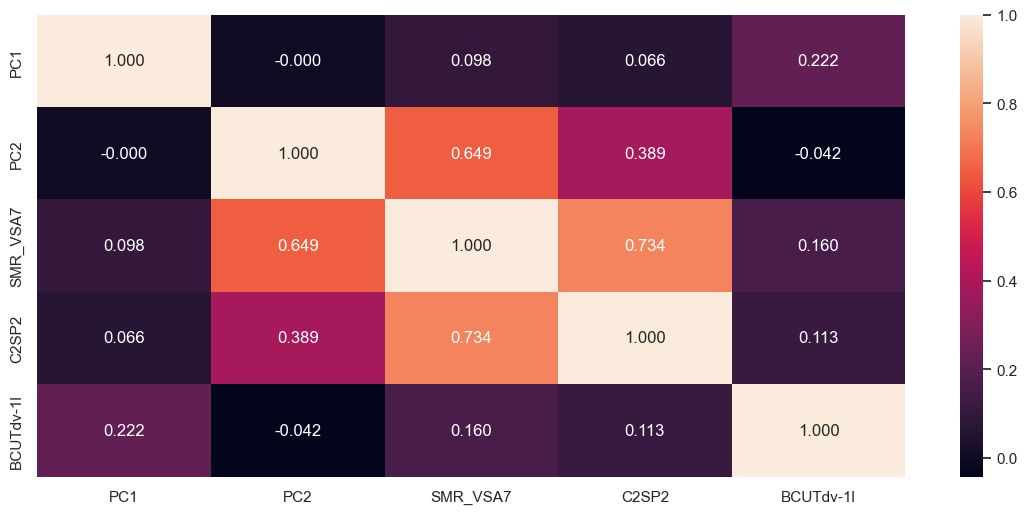

<Figure size 2800x1800 with 0 Axes>

In [45]:
df_pc = pd.DataFrame(data = X_sigmoid, columns =[f'PC{i}' for i in range(1, 3)] )
df_col = pd.concat([df_pc[['PC1','PC2']], df[['SMR_VSA7', 'C2SP2', 'BCUTdv-1l']]], axis =1)
corMatrix = pd.DataFrame.corr(df_col)
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(corMatrix, annot = True, fmt ='.3f')
plt.figure(figsize=(28,18))
plt.show

In [ ]:
Пара переменных PC2 и SMR_VSA7 имеет наивысшую положительную корреляцию среди всех представленных (0.649), что указывает на значительную прямую линейную зависимость между ними.

In [46]:
transformed_df.to_csv('2and3.csv',index=False)